In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('./young-people-survey-responses.csv')
orig = df.copy()
df.drop(columns='Unnamed: 0', inplace=True)
df

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,3.0,5.0,4.0,1.0,4.0,2.0,4.0,4.0,few hours a day,3.0,20.0,1.0,female,city
1006,4.0,4.0,5.0,4.0,5.0,5.0,1.0,1.0,4.0,less than an hour a day,3.0,27.0,5.0,male,village
1007,4.0,1.0,4.0,2.0,3.0,5.0,2.0,4.0,4.0,most of the day,1.0,18.0,0.0,female,city
1008,5.0,2.0,5.0,3.0,1.0,4.0,3.0,3.0,3.0,most of the day,3.0,25.0,1.0,female,city


In [108]:
df.dtypes

Music              float64
Techno             float64
Movies             float64
History            float64
Mathematics        float64
Pets               float64
Spiders            float64
Loneliness         float64
Parents' advice    float64
Internet usage      object
Finances           float64
Age                float64
Siblings           float64
Gender              object
Village - town      object
dtype: object

In [109]:
df['Village - town'].value_counts()

Village - town
city       707
village    299
Name: count, dtype: int64

In [110]:
df['Internet usage'].value_counts()

Internet usage
few hours a day            744
less than an hour a day    139
most of the day            124
no time at all               3
Name: count, dtype: int64

In [111]:
df.isna().sum()

Music              3
Techno             7
Movies             6
History            2
Mathematics        3
Pets               4
Spiders            5
Loneliness         1
Parents' advice    2
Internet usage     0
Finances           3
Age                7
Siblings           6
Gender             6
Village - town     4
dtype: int64

Text(0.5, 1.0, 'Loneliness Distribution')

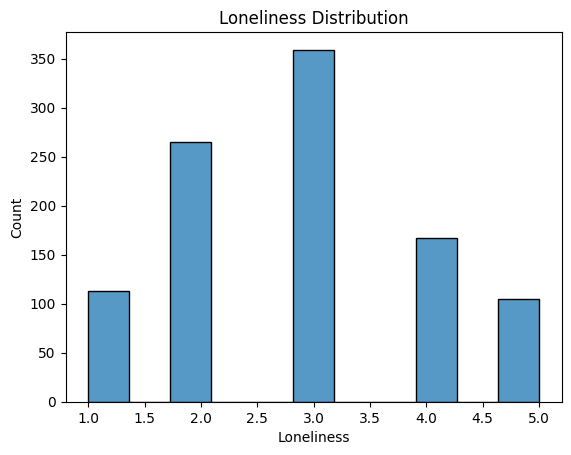

In [112]:
sns.histplot(df['Loneliness'])
plt.title('Loneliness Distribution')

---

In [113]:
df = df.dropna(subset=['Gender', 'Village - town'])
df.shape

(1000, 15)

In [114]:
df.isna().sum()

Music              3
Techno             6
Movies             6
History            2
Mathematics        3
Pets               4
Spiders            5
Loneliness         1
Parents' advice    1
Internet usage     0
Finances           3
Age                6
Siblings           5
Gender             0
Village - town     0
dtype: int64

## Set village and male

In [115]:
df['is_male'] = (df['Gender'] == 'male').astype(int)
df['is_village'] = (df['Village - town'] == 'village').astype(int)
df = df.drop(columns=['Gender', 'Village - town'])

/tmp/ipykernel_115441/3966066197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_male'] = (df['Gender'] == 'male').astype(int)
/tmp/ipykernel_115441/3966066197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_village'] = (df['Village - town'] == 'village').astype(int)


## Set internet usage

In [116]:
df['Internet usage'].value_counts()

Internet usage
few hours a day            738
less than an hour a day    138
most of the day            121
no time at all               3
Name: count, dtype: int64

In [117]:
usage = ['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day']
df['scale_internet_usage'] = df['Internet usage'].map({v: i for i, v in enumerate(usage)})
df = df.drop(columns=['Internet usage'])
df

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Finances,Age,Siblings,is_male,is_village,scale_internet_usage
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,20.0,1.0,0,1,2
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,3.0,19.0,2.0,0,0,2
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,2.0,20.0,2.0,0,0,2
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,2.0,22.0,1.0,0,0,3
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,4.0,20.0,1.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,3.0,5.0,4.0,1.0,4.0,2.0,4.0,4.0,3.0,20.0,1.0,0,0,2
1006,4.0,4.0,5.0,4.0,5.0,5.0,1.0,1.0,4.0,3.0,27.0,5.0,1,1,1
1007,4.0,1.0,4.0,2.0,3.0,5.0,2.0,4.0,4.0,1.0,18.0,0.0,0,0,3
1008,5.0,2.0,5.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,25.0,1.0,0,0,3


## Impute all numerics with averages

In [118]:
df.isna().sum() / len(df)

Music                   0.003
Techno                  0.006
Movies                  0.006
History                 0.002
Mathematics             0.003
Pets                    0.004
Spiders                 0.005
Loneliness              0.001
Parents' advice         0.001
Finances                0.003
Age                     0.006
Siblings                0.005
is_male                 0.000
is_village              0.000
scale_internet_usage    0.000
dtype: float64

In [119]:
for col in df.columns:
    mn = df[col].mean()
    df[col] = df[col].fillna(mn)
df.isna().sum() / len(df)

Music                   0.0
Techno                  0.0
Movies                  0.0
History                 0.0
Mathematics             0.0
Pets                    0.0
Spiders                 0.0
Loneliness              0.0
Parents' advice         0.0
Finances                0.0
Age                     0.0
Siblings                0.0
is_male                 0.0
is_village              0.0
scale_internet_usage    0.0
dtype: float64

## Remove unnecessary columns

In [120]:
df = df.drop(columns=['is_male', 'Techno', 'Movies', 'Finances', 'Age'])

In [121]:
df.corr()

,Music,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Siblings,is_village,scale_internet_usage
Music,1.000000,0.017524,-0.070220,0.070182,0.073621,0.061803,0.019230,-0.005831,-0.001338,0.071676
History,0.017524,1.000000,0.006616,0.040581,-0.074668,-0.038365,0.047079,-0.025373,-0.019094,0.000040
Mathematics,-0.070220,0.006616,1.000000,-0.029604,-0.122766,-0.030085,0.027941,0.084030,0.003778,0.049550
Pets,0.070182,0.040581,-0.029604,1.000000,0.103964,-0.046637,0.026337,-0.059407,0.070012,-0.059865
Spiders,0.073621,-0.074668,-0.122766,0.103964,1.000000,0.068739,0.025845,-0.050834,-0.064472,-0.004395
Loneliness,0.061803,-0.038365,-0.030085,-0.046637,0.068739,1.000000,-0.021474,-0.016749,0.015225,0.138467
Parents' advice,0.019230,0.047079,0.027941,0.026337,0.025845,-0.021474,1.000000,0.034787,0.017969,-0.091290
Siblings,-0.005831,-0.025373,0.084030,-0.059407,-0.050834,-0.016749,0.034787,1.000000,0.113478,-0.005832
is_village,-0.001338,-0.019094,0.003778,0.070012,-0.064472,0.015225,0.017969,0.113478,1.000000,-0.042931
scale_internet_usage,0.071676,0.000040,0.049550,-0.059865,-0.004395,0.138467,-0.091290,-0.005832,-0.042931,1.000000


Text(0.5, 1.0, 'Correlation heatmap with small range and minimal columns')

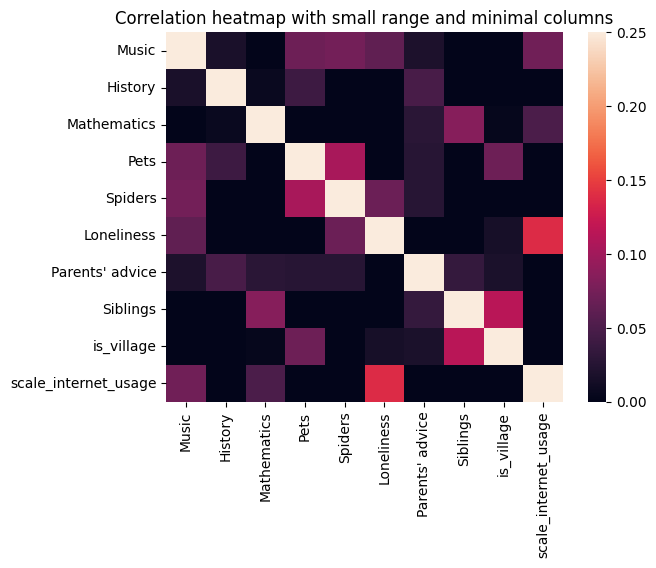

In [122]:
sns.heatmap(df.corr(), vmin=0, vmax=0.25)
plt.title('Correlation heatmap with small range and minimal columns')

In [123]:
df.shape

(1000, 10)

---

# Train and split

In [124]:
from sklearn.model_selection import train_test_split

X = np.array(df.drop(columns=['Loneliness']))
y = np.array(df['Loneliness'])

test_percentage = 0.20

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_percentage, random_state=15)

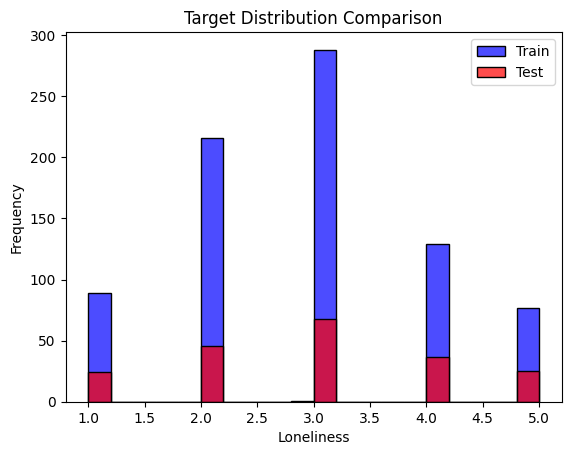

In [125]:
sns.histplot(y_train, alpha=0.7, label='Train', color='blue', bins=20)
sns.histplot(y_test, alpha=0.7, label='Test', color='red', bins=20)
plt.xlabel('Loneliness')
plt.ylabel('Frequency')
plt.title('Target Distribution Comparison')
plt.legend()

In [126]:
print(np.mean(y_train))
print(np.mean(y_test))
print(np.std(y_train))
print(np.std(y_test))

2.8611023523523524
2.965
1.1144392685742164
1.180582483353027


---

# Data normalization

## Normalize data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'History'),
  Text(2, 0, 'Mathematics'),
  Text(3, 0, 'Pets'),
  Text(4, 0, 'Spiders'),
  Text(5, 0, 'Loneliness'),
  Text(6, 0, "Parents' advice"),
  Text(7, 0, 'Siblings'),
  Text(8, 0, 'is_village'),
  Text(9, 0, 'scale_internet_usage')])

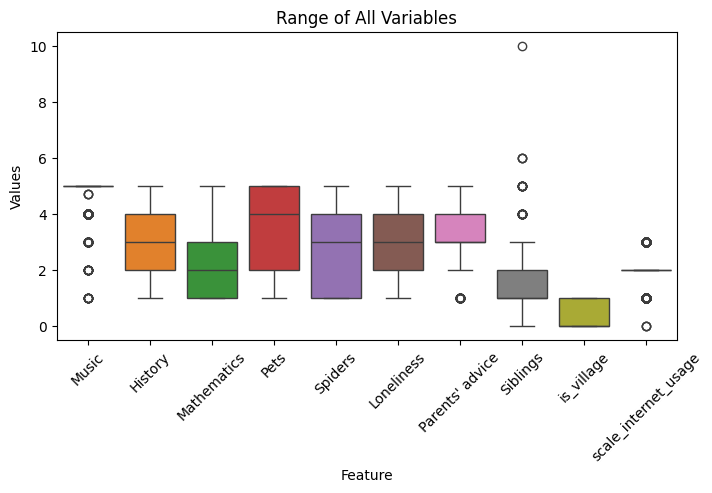

In [127]:
plt.figure(figsize=(8, 4))
sns.boxplot(df)
plt.title('Range of All Variables')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=45)

In [128]:
print(orig.shape)
print(df.shape)

(1010, 16)
(1000, 10)


---

## Model Attempt

In [143]:
from sklearn.naive_bayes import CategoricalNB

nb_model = CategoricalNB()
nb_model.fit(X_train, y_train.round())
nb_model

,"alpha alpha: float, default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"min_categories min_categories: int or array-like of shape (n_features,), default=NoneMinimum number of categories per feature.- integer: Sets the minimum number of categories per feature to `n_categories` for each features.- array-like: shape (n_features,) where `n_categories[i]` holds the minimum number of categories for the ith column of the input.- None (default): Determines the number of categories automatically from the training data... versionadded:: 0.24",None


In [144]:
y_pred = nb_model.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 1  6 16  0  1]
 [ 3 11 30  2  0]
 [ 1 13 52  2  0]
 [ 0  8 28  0  1]
 [ 0  5 18  1  1]]


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.20      0.04      0.07        24
         2.0       0.26      0.24      0.25        46
         3.0       0.36      0.76      0.49        68
         4.0       0.00      0.00      0.00        37
         5.0       0.33      0.04      0.07        25

    accuracy                           0.33       200
   macro avg       0.23      0.22      0.18       200
weighted avg       0.25      0.33      0.24       200

